In [1]:
## importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("/content/drive/MyDrive/customer_churn_dataset-training-master.csv")

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
 df.drop_duplicates(inplace= True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.columns.values

array(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype=object)

In [9]:
df.shape

(440833, 12)

In [10]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [11]:
X = df.drop(columns=['CustomerID', 'Churn'])  # Drop ID and target
y = df['Churn']

In [12]:
X.shape

(440833, 10)

In [13]:
categorical_cols = [
    'Gender',
    'Subscription Type',
    'Contract Length'
]
numerical_cols = [
    'Age',
    'Tenure',
    'Usage Frequency',
    'Support Calls',
    'Payment Delay',
    'Total Spend',
    'Last Interaction'
]

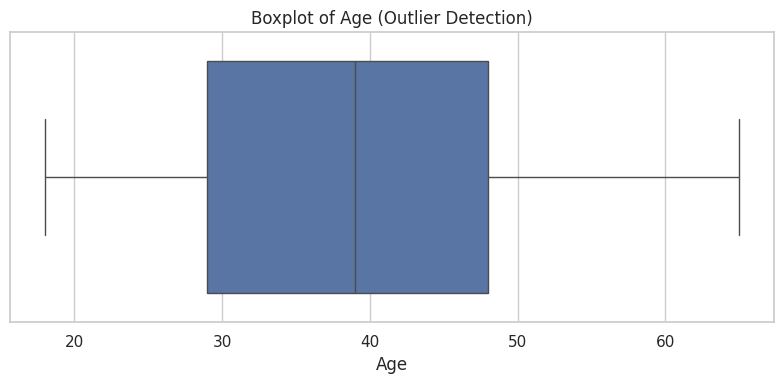

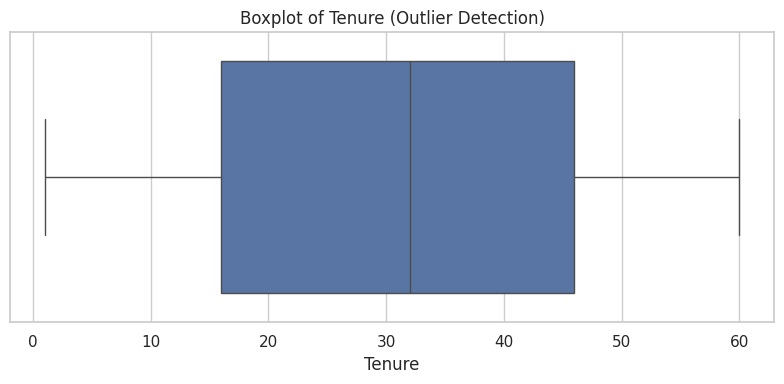

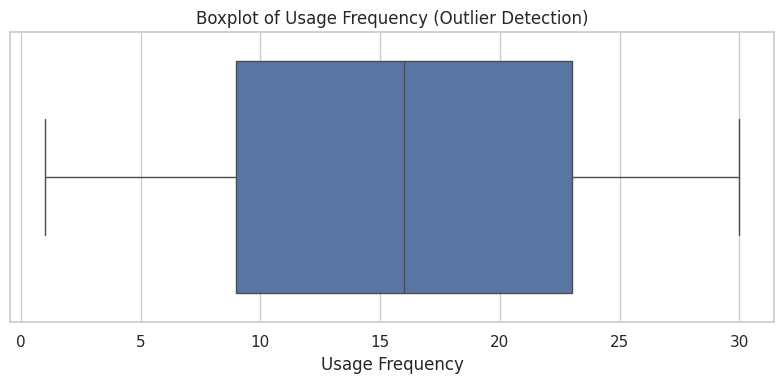

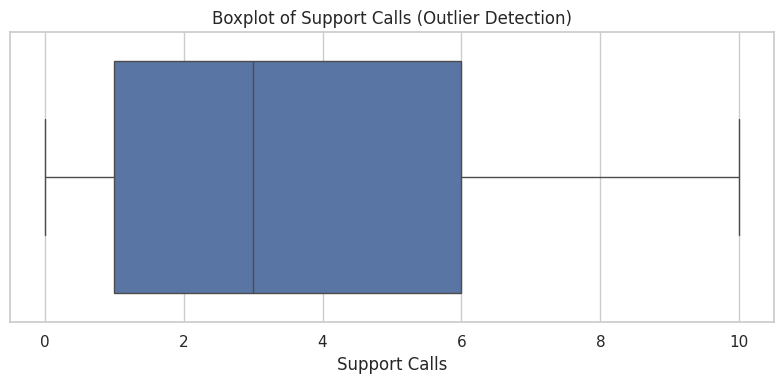

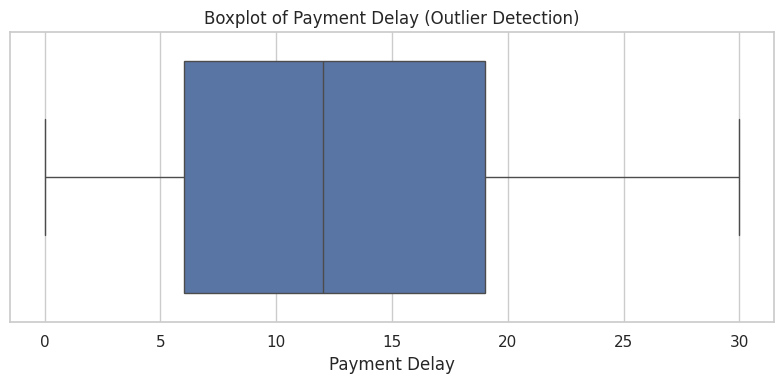

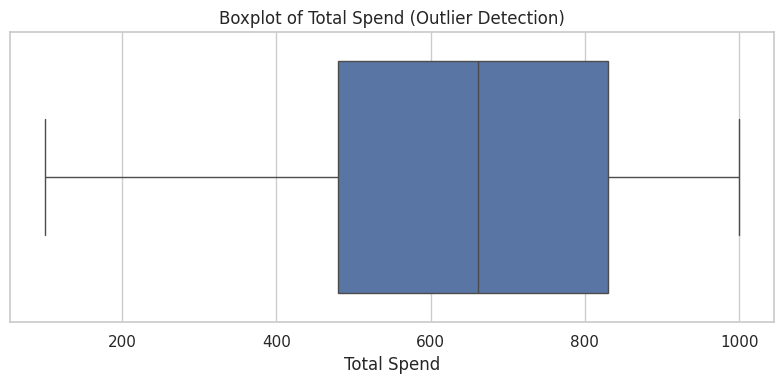

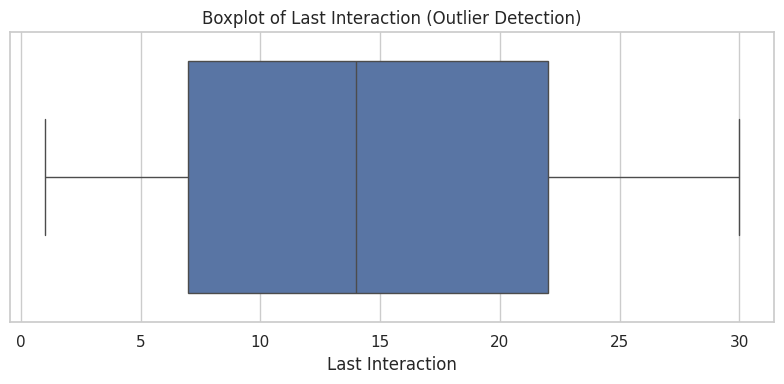

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume your DataFrame is called `df`
# df = pd.read_csv("your_file.csv")  # if needed

# Define the columns
numerical_cols = [
    'Age', 'Tenure', 'Usage Frequency', 'Support Calls',
    'Payment Delay', 'Total Spend', 'Last Interaction'
]

# Set the style
sns.set(style="whitegrid")

# Plot boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col} (Outlier Detection)')
    plt.tight_layout()
    plt.show()


In [17]:
from sklearn.impute import SimpleImputer
# Pipeline for numerical features
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("standard_scaler", StandardScaler())
])

# Pipeline for categorical (ordinal-style) features
cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal_encoding", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])
# Combine both pipelines using ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ("cat_pipeline", cat_pipe, categorical_cols),
    ("num_pipeline", num_pipe, numerical_cols)
])

In [18]:
transformer

ColumnTransformer(transformers=[('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Gender', 'Subscription Type',
                                  'Contract Length']),
                                ('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 ['Age', 'Tenure', 'Usage Frequency',
                                  'Support Calls', 'Payment Delay',
                                  'Total Spend', 'Last Interaction'])])

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
final_pl = Pipeline(steps =[("transformer",transformer),("estimator",DecisionTreeClassifier())])

In [21]:
final_pl

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoding',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Gender',
                                                   'Subscription Type',
                                                   'Contract Length']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction'])])),
                ('estimator', DecisionTreeClassifier())])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=23)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(330624, 10)
(330624,)
(110209, 10)
(110209,)


In [24]:
# Combine X and y temporarily to drop rows with missing target
train_df = X_train.copy()
train_df['target'] = y_train

# Drop rows with missing target
train_df = train_df.dropna(subset=['target'])

# Split back into X and y
X_train_clean = train_df.drop(columns='target')
y_train_clean = train_df['target']

In [25]:
final_pl.fit(X_train_clean, y_train_clean)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('cat_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoding',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Gender',
                                                   'Subscription Type',
                                                   'Contract Length']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction'])])),
                ('estimator', DecisionTreeClassifier())])

In [26]:
y_pred =final_pl.predict(X_test)

In [27]:
y_pred

array([0., 1., 0., ..., 0., 1., 0.])

In [28]:
r2_score(y_test,y_pred)

0.99933366658256

In [29]:
### picking the final_pl2 object

import pickle

with open("Customer_Classify.pkl","wb") as f:
    pickle.dump(final_pl,f)

In [30]:
with open("Customer_Classify.pkl","rb") as f:
    model = pickle.load(f)

In [32]:
import pandas as pd

input_data = pd.DataFrame([{
    'Age': 30.0,
    'Gender': 'Female',
    'Tenure': 39.0,
    'Usage Frequency': 14.0,
    'Support Calls': 5.0,
    'Payment Delay': 18.0,
    'Subscription Type': 'Standard',
    'Contract Length': 'Annual',
    'Total Spend': 932.0,
    'Last Interaction': 17.0
}])

model.predict(input_data)


array([1.])

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [34]:
# Build and compile the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# Set up TensorBoard and EarlyStopping
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [39]:
# Apply the transformer to the training and testing data
X_train_processed = transformer.fit_transform(X_train_clean)
X_test_processed = transformer.transform(X_test)

# Train the model
history = model.fit(X_train_processed, y_train_clean, validation_data=(X_test_processed, y_test), epochs=10, callbacks=[tensorboard_callback, early_stopping_callback])

Epoch 1/10
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9914 - loss: 0.0290 - val_accuracy: 0.9922 - val_loss: 0.0267
Epoch 2/10
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9929 - loss: 0.0247 - val_accuracy: 0.9944 - val_loss: 0.0218
Epoch 3/10
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9936 - loss: 0.0228 - val_accuracy: 0.9937 - val_loss: 0.0220
Epoch 4/10
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9944 - loss: 0.0205 - val_accuracy: 0.9941 - val_loss: 0.0205
Epoch 5/10
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9945 - loss: 0.0205 - val_accuracy: 0.9953 - val_loss: 0.0196
Epoch 6/10
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9953 - loss: 0.0171 - val_accuracy: 0.9962 - val_loss: 0.0159
Epoch 7/10
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9955 - loss: 0.0173 - val_accuracy: 0.9969 - val_loss: 0.0129
Epoch 8/10
10332/10332 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 